In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
import lightgbm as lgb

In [4]:
if 0:
    sys.path.insert(0,os.getcwd()+"/../../src/main")
else:
    sys.path.insert(0, "/mnt/lanlep2019/src/main")
    os.environ['LOCAL']="/mnt/local"

In [5]:
!echo $LOCAL

/mnt/local


In [6]:
!mkdir -p $LOCAL/sandbox

In [7]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/mnt/local/sandbox'

In [8]:
os.environ['LANLEP_HOME']=HOME

In [9]:
import data, utils, config

In [10]:
if 0:
    !ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/
else:
    !cd {HOME}/input/feat/ && cat /mnt/lizhen-east2/notebook/fastseq/5/tmp.tar | tar xf - 
    !cd {HOME}/input/feat/ && cat /mnt/lizhen-east2/notebook/fastseq/5/tmppkl.tar | tar xf -     

In [11]:
if 1:
    !cd {HOME}/input/ && cp /mnt/lizhen-east2/notebook/fastseq/5/train.parq .

In [12]:
if 1:
    !cd {HOME}/input/ &&   cat /mnt/lizhen-east2/notebook/fastseq/5/trainqs.tar | tar xf - 

In [13]:
def readq(qno):
    return fastparquet.ParquetFile("input/quake_{}.parq".format(qno)).to_pandas()

In [195]:
a=readq(15)

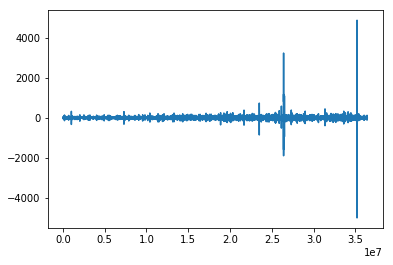

In [199]:
a.acoustic_data.plot()

In [14]:
if 0:
    powers=[]
    for qno in range(1,16):
        df=readq(qno)
        df['power']=(df['acoustic_data']**2).cumsum()
        df=df[['power']]
        df['qno']=qno
        df['qno']=df['qno'].astype(np.int8)
        powers.append(df)
    powers=pd.concat(powers).reset_index()
    powers=powers.reset_index()

In [15]:
logger=utils.get_logger("test")

In [16]:
if 1:
    a = fastparquet.ParquetFile("./input/feat/dense_train_seq_fwv_offset_0.parq").to_pandas()
    b = fastparquet.ParquetFile("./input/feat/dense_train_seq_fwv_offset_125.parq").to_pandas()
    traintest=(a+b)/2

In [17]:
traintest.sort_index().head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_00_0000_000000  0.216542  0.185661  0.108143 -0.078809  0.072412   
quake_00_0000_001500  0.216926  0.186926  0.107084 -0.078361  0.072662   
quake_00_0000_003000  0.218769  0.185365  0.107872 -0.077107  0.068210   
quake_00_0000_004500  0.217223  0.187727  0.107976 -0.075922  0.069759   
quake_00_0000_006000  0.217587  0.189069  0.109821 -0.078284  0.067517   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  \
index                                                                    
quake_00_0000_000000 -0.139160 -0.031245  0.159314  0.176967  0.008096   
quake_00_0000_001500 -0.141274 -0.032242  0.155919  0.177656  0.008914   
quake_00_0000_003000 -0.144663 -0.027850  0.152220  0.177217  0.014360   
quake_00_0000_004500 -0.149111 -0.028620  0.147861  0.177286  0.021192   
quake_00_0000_006000 -0.148003 -0.027025  0.151348  0.174712  0.022093   

                        ...       fwv_91    fwv_92    fwv_93    fwv_94  \
index                   ...                                              
quake_00_0000_000000    ...     0.211306  0.132915  0.057632 -0.069395   
quake_00_0000_001500    ...     0.212022  0.133815  0.060779 -0.068313   
quake_00_0000_003000    ...     0.213136  0.137043  0.060594 -0.067772   
quake_00_0000_004500    ...     0.210489  0.139401  0.061828 -0.065347   
quake_00_0000_006000    ...     0.209734  0.137879  0.058090 -0.065387   

                        fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  \
index                                                                    
quake_00_0000_000000  0.011235 -0.035435 -0.102105  0.053612  0.032469   
quake_00_0000_001500  0.015169 -0.034959 -0.099313  0.053454  0.029014   
quake_00_0000_003000  0.017519 -0.036653 -0.097048  0.052951  0.025466   
quake_00_0000_004500  0.015690 -0.038876 -0.095629  0.053188  0.021562   
quake_00_0000_006000  0.018760 -0.038393 -0.095949  0.053929  0.024904   

                             y  
index                           
quake_00_0000_000000  1.430797  
quake_00_0000_001500  1.430796  
quake_00_0000_003000  1.429798  
quake_00_0000_004500  1.429797  
quake_00_0000_006000  1.428700  

[5 rows x 101 columns]

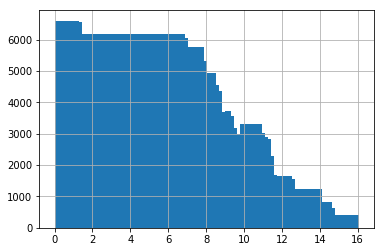

In [18]:
traintest.y.hist(bins=100);

In [19]:
np.abs(traintest.y-traintest.y.median()).mean()

3.02918898210172

In [20]:
traindf=traintest.drop('y',axis=1)
ydf=traintest.y
qdf=traindf.index.map(lambda u: int(u.split("_")[1]))

In [21]:
idx=~qdf.isin({0,16})
traindf=traindf[idx]
ydf=ydf[idx]
qdf=qdf[idx]

In [22]:
def f(u):
    qno, i, offset = [int(x) for x in u.split('_')[1:]]
    return 0+offset+i*150 * 1000
    
globaloffset = pd.Series(traindf.index.map(f), index=traindf.index).to_frame() 
globaloffset.columns=['offset']
globaloffset['qno']=qdf
globaloffset.head()

offset  qno
index                              
quake_03_0200_105000  30105000    3
quake_06_0120_099000  18099000    6
quake_07_0296_013500  44413500    7
quake_03_0090_034500  13534500    3
quake_08_0137_055500  20605500    8

In [24]:
def power(qno):
        df=readq(qno)
        df['power']=(df['acoustic_data']**2).cumsum()
        return df['power'].to_dict()
def dpower(qno):
        df=readq(qno)
        df['dpower']=(df['acoustic_data']**2)
        return df['dpower'].to_dict()    

In [25]:
lst=[]
for qno in range(1,16):
    print qno,
    d=power(qno)
    d2=dpower(qno)
    a=globaloffset[globaloffset['qno']==qno]
    a['power']=a['offset'].map(lambda u: d[u])
    a['dpower']=a['offset'].map(lambda u: d2[u])
    lst.append(a)    

1

/home/hadoop/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hadoop/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 2 3 4 5 6 7 8 9 10 11 12 13 14 15


In [26]:
powers=pd.concat(lst).loc[globaloffset.index]
powers.head()

offset  qno       power  dpower
index                                                  
quake_03_0200_105000  30105000    3  1926743110      64
quake_06_0120_099000  18099000    6   870869232      16
quake_07_0296_013500  44413500    7  3030793889       1
quake_03_0090_034500  13534500    3   553090317       9
quake_08_0137_055500  20605500    8   904479955      25

In [27]:
del d,d2,a, lst

In [28]:
import gc
gc.collect()

154

In [34]:
powers.groupby('qno')['dpower'].aggregate(['mean','median','count']).T.round(2)

qno           1         2         3         4         5         6         7   \
mean      107.68    111.25    103.44     84.22     81.61    432.95     83.52   
median     25.00     25.00     25.00     25.00     25.00     25.00     25.00   
count   29520.00  36295.00  22631.00  32480.00  20574.00  18018.00  41240.00   

qno           8         9         10        11        12        13        14  \
mean      168.47    143.28     86.36    235.08    100.58     70.52     98.61   
median     25.00     25.00     25.00     25.00     25.00     25.00     25.00   
count   20192.00  24635.00  29228.00  28196.00  22560.00  21885.00  37761.00   

qno           15  
mean       66.03  
median     16.00  
count   24179.00

In [56]:
powers['dpower'].mean()

123.1921962705853

In [37]:
BT0=powers['power'].values

In [38]:
ydf.shape,traindf.shape

((409394,), (409394, 100))

In [88]:
onehots=pd.concat([powers['qno']==qno for qno in range(1,16)],axis=1).astype(np.int8)

In [90]:
T0=globaloffset['offset'].values

In [91]:
BT0.shape,T0.shape

((409394,), (409394,))

In [92]:
traindf.shape

(409394, 100)

In [93]:
H=np.concatenate([traindf.values,onehots, np.ones([len(traindf),1]), -T0.reshape([-1,1])],axis=1)

In [94]:
H.shape,BT0.shape, H.dtype

((409394, 117), (409394,), dtype('float64'))

In [95]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
x,residuals,rank,s = np.linalg.lstsq(H, -BT0)

/home/hadoop/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [97]:
x

array([ 1.15602794e+09,  1.31261550e+09,  1.32129012e+09, -4.71489456e+08,
       -4.20579218e+08, -2.56712993e+08, -1.03078996e+08,  1.10516163e+09,
        4.16125183e+08,  4.67277967e+08,  2.16447160e+09, -2.83279070e+08,
        1.51906453e+08,  4.86357310e+08, -6.65416426e+08,  1.03369134e+09,
        8.62266446e+08,  4.52890120e+08, -9.11788133e+08, -8.97947629e+08,
        1.33733443e+09, -4.30190462e+08, -2.45063059e+09, -4.86039946e+08,
        1.17243072e+09,  3.72251601e+08, -1.41528077e+09, -4.47925548e+08,
       -1.08539863e+09, -1.82763834e+09,  2.41018684e+08,  5.29454386e+08,
       -1.45786042e+09,  2.43501514e+09, -1.14045326e+09,  2.04608425e+09,
        2.88963310e+07,  8.03448352e+08, -1.74021662e+09,  9.48639237e+08,
        6.25531088e+08, -1.98355373e+08, -2.60061395e+08, -2.57769700e+08,
       -1.23315829e+09, -3.08734100e+08, -3.65065545e+08,  1.36443100e+09,
        1.14673087e+09,  1.29674079e+09,  5.73559179e+07, -1.01325051e+09,
       -1.01378442e+08, -

In [98]:
reg=LinearRegression().fit(H,-BT0)
reg.score(H,-BT0)

0.927108698685783

In [99]:
x.shape

(117,)

In [101]:
alpha_prime=x[:100]
As=x[100:100+15]
beta_prime=x[-2]
k1=x[-1]

In [103]:
beta_prime,k1

(-3823645365.0299454, 110.9792411327362)

In [178]:
k2=k1-123.1921962705853
k2=5.5*k2
k2

-67.17125325817001

In [179]:
powers['ytrue']=ydf

In [180]:
powers['A']=powers['qno'].map(lambda u: As[u-1])

In [181]:
powers['k2']=k2

In [182]:
tick_per_sec=2.597512307545933e-07

In [183]:
powers['ypred']= (powers['A']+powers['offset']*k1-powers['power'])/k2*tick_per_sec
powers.head()

offset  qno       power  dpower     ytrue     ypred  \
index                                                                         
quake_03_0200_105000  30105000    3  1926743110      64  0.998098 -4.273091   
quake_06_0120_099000  18099000    6   870869232      16  2.318898 -1.467141   
quake_07_0296_013500  44413500    7  3030793889       1  4.532197 -6.981816   
quake_03_0090_034500  13534500    3   553090317       9  5.302996 -2.473665   
quake_08_0137_055500  20605500    8   904479955      25  2.514399 -4.471003   

                                 A         k2  
index                                          
quake_03_0200_105000 -3.092724e+08 -67.171253  
quake_06_0120_099000 -7.583437e+08 -67.171253  
quake_07_0296_013500 -9.269630e+07 -67.171253  
quake_03_0090_034500 -3.092724e+08 -67.171253  
quake_08_0137_055500 -2.261084e+08 -67.171253

In [191]:
from scipy.optimize import minimize
def calibrate_k2_bk(qno):
    df=powers[powers['qno']==qno]
    
    
    def fun(k2):
        df['ypred']= (df['A']+df['offset']*k1-df['power'])/k2*tick_per_sec
        bb=df['ypred'].values
        aa=df['ytrue'].values
        if 1:
            sidx=np.argsort(aa)
            bb=bb[sidx]
            aa=aa[sidx]
        if 1:
            n=int(len(aa)*0.4)
            model = LinearRegression().fit(aa[-n:].reshape(-1, 1),bb[-n:])
        return  np.abs((model.coef_[0]-1))
    
    k2_init= df.iloc[0]['k2']
    
    result = minimize(fun,k2_init, method='Nelder-Mead', options ={"fatol":0.001})
    print result
    k2=result['x'][0]
    powers.loc[powers['qno']==qno,'k2']=k2
    return result

def calibrate_k2():
    
    
    def fun(k2):
        lst=[]
        for qno in range(1,16):
            df=powers[powers['qno']==qno]
            df['ypred']= (df['A']+df['offset']*k1-df['power'])/k2*tick_per_sec
            bb=df['ypred'].values
            aa=df['ytrue'].values
            if 1:
                sidx=np.argsort(aa)
                bb=bb[sidx]
                aa=aa[sidx]
            if 1:
                n=int(len(aa)*0.4)
                model = LinearRegression().fit(aa[-n:].reshape(-1, 1),bb[-n:])
            lst.append(np.abs((model.coef_[0]-1)))
        return np.mean(lst)
    
    k2_init= powers.iloc[0]['k2']
    
    result = minimize(fun,k2_init, method='Nelder-Mead', options ={"fatol":0.001})
    print result
    k2=result['x'][0]
    powers.loc[:,'k2']=k2
    return result


def calibrate_A(qno):
    df=powers[powers['qno']==qno]
    
    
    def fun(A):
        df['ypred']= (A+df['offset']*k1-df['power'])/df['k2']*tick_per_sec
        bb=df['ypred'].values
        aa=df['ytrue'].values
        if 1:
            sidx=np.argsort(aa)
            bb=bb[sidx]
            aa=aa[sidx]
        n=int(len(aa)*0.3)
        m = bb[:n].min()
        return np.abs(m)

    A_init= df.iloc[0]['A']
    result = minimize(fun,A_init, method='Nelder-Mead', options ={"fatol":0.001})
    print result
    A=result['x'][0]
    powers.loc[powers['qno']==qno,'A']=A
    return result

                

In [185]:
%%time
res = calibrate_k2( )

/home/hadoop/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 final_simplex: (array([[-68.4170824 ],
       [-68.41713364]]), array([0.03030613, 0.03030616]))
           fun: 0.030306128464389705
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([-68.4170824])
CPU times: user 4min 47s, sys: 3.62 s, total: 4min 50s
Wall time: 36.4 s


In [192]:
%%time
for qno in range(1,16):
    res = calibrate_A(qno)

/home/hadoop/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 final_simplex: (array([[-1.81276206e+09],
       [-1.81276206e+09]]), array([1.28535030e-13, 1.84655959e-13]))
           fun: 1.285350301521082e-13
       message: 'Optimization terminated successfully.'
          nfev: 82
           nit: 41
        status: 0
       success: True
             x: array([-1.81276206e+09])
 final_simplex: (array([[-1.93699418e+09],
       [-1.93699418e+09]]), array([1.81035254e-15, 3.33104867e-13]))
           fun: 1.8103525373536366e-15
       message: 'Optimization terminated successfully.'
          nfev: 82
           nit: 41
        status: 0
       success: True
             x: array([-1.93699418e+09])
 final_simplex: (array([[-1.49022777e+09],
       [-1.49022777e+09]]), array([1.81035254e-15, 2.55259708e-13]))
           fun: 1.8103525373536366e-15
       message: 'Optimization terminated successfully.'
          nfev: 82
           nit: 41
        status: 0
       success: True
             x: array([-1.49022777e+09])
 final_simplex: (array([[-

In [193]:
powers['ypred']= (powers['A']+powers['offset']*k1-powers['power'])/powers['k2']*tick_per_sec
powers.head()

offset  qno       power  dpower     ytrue     ypred  \
index                                                                         
quake_03_0200_105000  30105000    3  1926743110      64  0.998098  0.288316   
quake_06_0120_099000  18099000    6   870869232      16  2.318898  0.006045   
quake_07_0296_013500  44413500    7  3030793889       1  4.532197  1.353842   
quake_03_0090_034500  13534500    3   553090317       9  5.302996  2.054976   
quake_08_0137_055500  20605500    8   904479955      25  2.514399  1.196321   

                                 A         k2  
index                                          
quake_03_0200_105000 -1.490228e+09 -68.417082  
quake_06_0120_099000 -1.139336e+09 -68.417082  
quake_07_0296_013500 -2.254777e+09 -68.417082  
quake_03_0090_034500 -1.490228e+09 -68.417082  
quake_08_0137_055500 -1.697407e+09 -68.417082

[1.00311188] -4.764579009536382
1 1.285350301521082e-13 6.8823042901649565


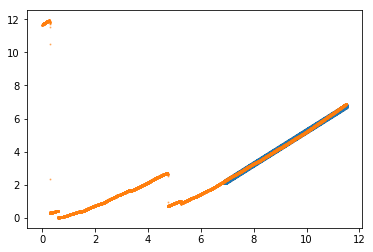

[0.99143124] -6.8362833730701755
2 1.8103525373536366e-15 7.3539619913523495


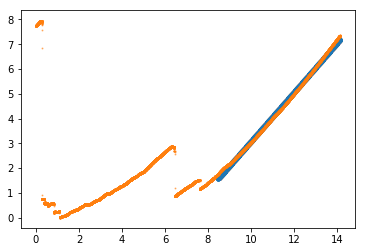

[1.03987004] -3.5769927478954777
3 -1.8103525373536366e-15 5.657775636658494


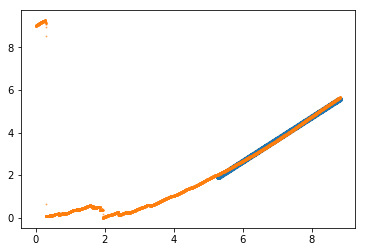

[0.96637276] -5.388046466824019
4 -6.87933964194382e-14 6.949781011817695


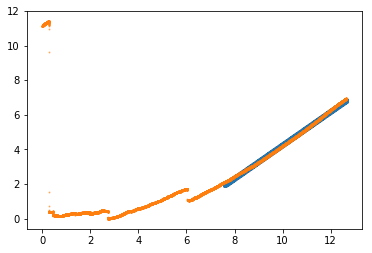

[1.06092701] -2.0639641712342325
5 1.4573337925696775e-13 6.4671158837032525


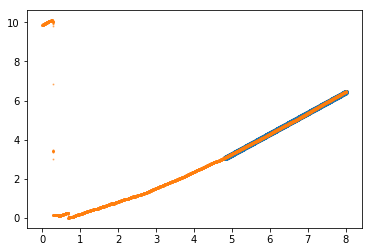

[0.99774929] -2.733329334142683
6 -0.046131638831432925 4.3255869172781924


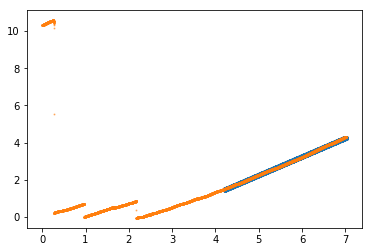

[0.99999942] -7.679533209581178
7 9.41383319423891e-14 8.560452376132767


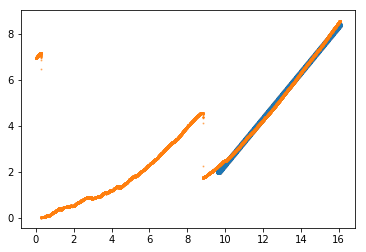

[1.05297041] -1.8460325312195929
8 7.060374895679183e-14 6.444349902739038


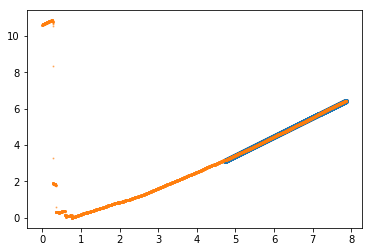

[1.03751301] -2.523623111553726
9 -3.43966982097191e-14 7.45446197047624


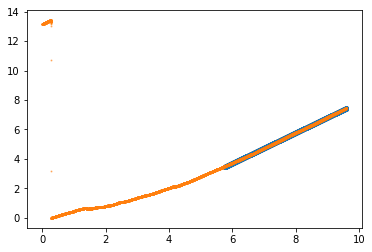

[0.99855879] -3.6800254437834132
10 3.801740328442637e-14 7.774898425096407


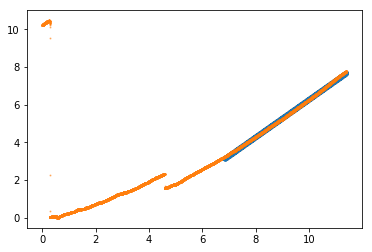

[0.98044998] -3.2847682609993942
11 9.41383319423891e-14 7.583303258423499


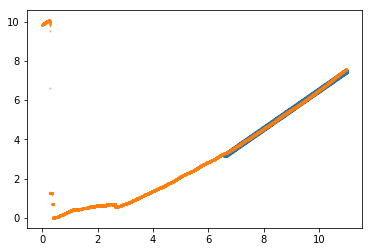

[0.99993433] -2.56611306507551
12 -5.974163373267e-14 6.2761402322770214


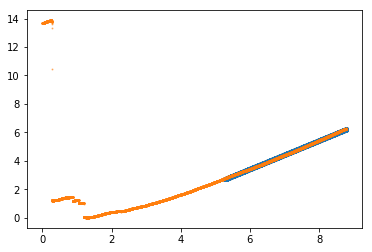

[1.04438157] -1.788021218300238
13 -5.974163373267e-14 7.124803071053132


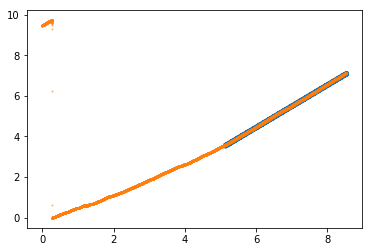

[0.96225691] -6.609009456696119
14 -8.689692179297455e-14 7.694792664821377


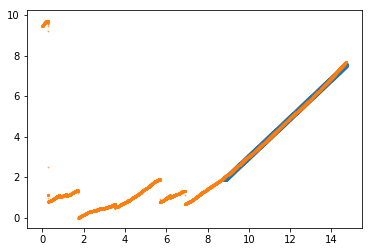

[1.11257073] -4.299600285095001
15 4.887951850854819e-14 6.228592485518291


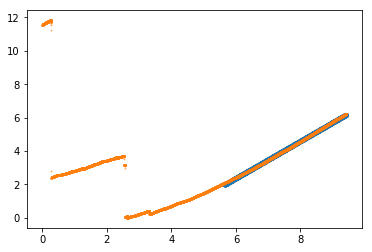

In [194]:
for qno in range(1,16):
    idx=powers['qno']==qno
    bb=powers[idx]['ypred'].values
    aa=powers[idx]['ytrue'].values
    if 1:
        sidx=np.argsort(aa)
        bb=bb[sidx]
        aa=aa[sidx]
    if 1:
        n=int(len(aa)*0.4)
        model = LinearRegression().fit(aa[-n:].reshape(-1, 1),bb[-n:])
        print model.coef_, model.intercept_
        pbb=model.predict(aa[-n:].reshape(-1, 1))
        plt.scatter(aa[-n:].reshape(-1, 1),pbb,s=11)
    print qno,bb.min(),bb[-n:].max()
    plt.scatter(aa,bb,s=1,alpha=0.5)
    plt.show()

In [49]:
b=a[globaloffset.values].values*tick_per_sec

((409394, 102), (409394,))

In [49]:
colors= [
        "FF0000", "00FF00", "0000FF", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0", 
    ]
colors=[np.array([int(h[i:i+2], 16)/255.0 for i in (0, 2 ,4)]) for h in colors]

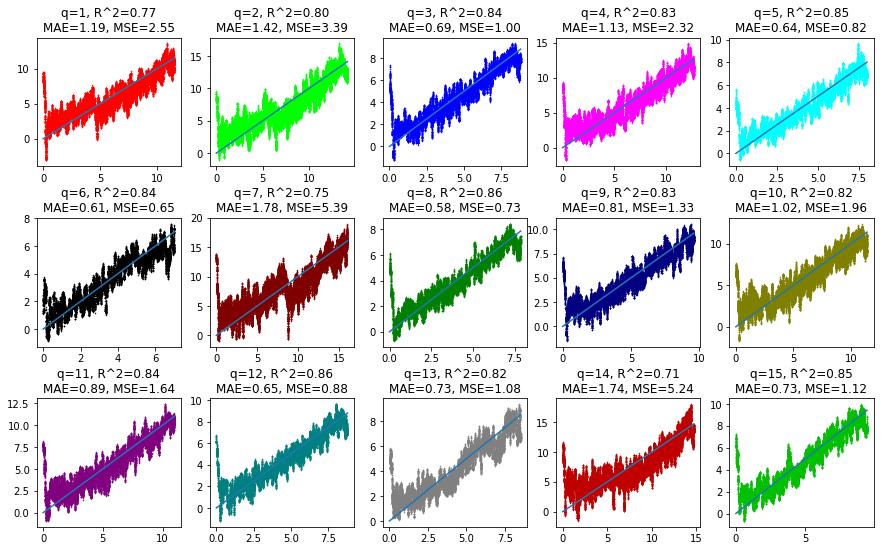

In [50]:
fig, axs = plt.subplots(figsize=(15,9), 
                        nrows=3, ncols=5,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

references=sorted(set(qdf))

for ax, (i,qno) in zip(axs.flatten(), enumerate(references)):
    X=traindf[qdf==qno]
    Y=ydf[qdf==qno]
    reg = Ridge().fit(X,Y)
    x,y=Y,reg.predict(X)
    ax.scatter(x.values,y,s=0.3,c=colors[i])
    b=sorted(x.values)
    ax.plot(b,b)
    ax.set_title('q={}, R^2={:.2f}\nMAE={:.2f}, MSE={:.2f}'.format(qno,r2_score(x,y), mean_absolute_error(x,y)
                                                                   ,mean_squared_error(x,y)))
    

In [41]:
#! cd /mnt && tar xf /mnt/lizhen-east2/notebook/fastseq/5/trainqs.tar

In [35]:
def readq(qno):
    return fastparquet.ParquetFile("/mnt/quake_{}.parq".format(qno)).to_pandas()

In [58]:
q=readq(14)

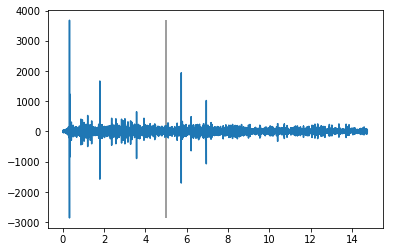

In [59]:
plt.plot(q.time_to_failure, q.acoustic_data);
plt.vlines(x=5,ymin=q.acoustic_data.min(), ymax=q.acoustic_data.max(),alpha=0.5);

In [42]:
reg = LinearRegression().fit(traindf, ydf)

In [43]:
reg.score(traindf,ydf)

0.47749277921675126

In [44]:
trainpred=reg.predict(traindf)

In [45]:
err=ydf.values-trainpred
np.sqrt(np.mean(err*err)),np.sqrt(np.median(np.abs(err)))

(2.6242166651851453, 1.3087841294000262)

In [46]:
a=ydf.copy().to_frame()
a['pred']=trainpred
a['abserr']=np.abs(a['pred']-a['y'])
a['qno']=a.index.map(lambda u: int(u.split("_")[1]))

In [47]:
a.groupby('qno')['abserr'].apply(lambda u: np.sqrt(np.mean(u.values**2))).sort_values()

qno
11    1.631354
9     1.644194
10    1.805674
12    1.875820
1     1.888808
3     1.897652
15    2.231170
13    2.233907
4     2.364902
5     2.658899
8     2.727387
6     2.837420
2     3.057987
14    3.505263
7     4.003069
Name: abserr, dtype: float64

In [48]:
a.groupby('qno')['abserr'].apply(lambda u:  np.mean(u.values)).sort_values()

qno
9     1.134728
11    1.205874
10    1.388971
3     1.443394
12    1.443830
1     1.481676
15    1.782918
13    1.812713
4     1.998983
5     2.332561
8     2.474056
6     2.487523
2     2.559095
14    2.991004
7     3.303495
Name: abserr, dtype: float64

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
colors= [
        "FF0000", "00FF00", "0000FF", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0", 
    ]
colors=[np.array([int(h[i:i+2], 16)/255.0 for i in (0, 2 ,4)]) for h in colors]

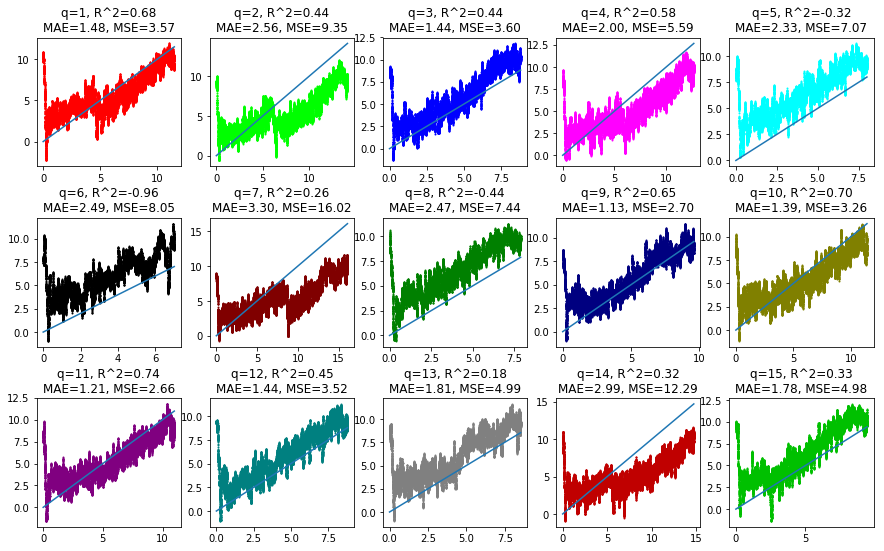

In [51]:
fig, axs = plt.subplots(figsize=(15,9), 
                        nrows=3, ncols=5,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

references=sorted(set(a['qno']))

for ax, (i,qno) in zip(axs.flatten(), enumerate(references)):
    x,y=a[a['qno']==qno]['y'],a[a['qno']==qno]['pred']
    ax.scatter(x,y,s=1,c=colors[i])
    b=sorted(x.values)
    ax.plot(b,b)
    ax.set_title('q={}, R^2={:.2f}\nMAE={:.2f}, MSE={:.2f}'.format(qno,r2_score(x,y), mean_absolute_error(x,y)
                                                                   ,mean_squared_error(x,y)))
    